# 데이터 가공

## 패키지 임포트

In [4]:
# 넘파이와 판다스 라이브러리 가져오기
import numpy as np
import pandas as pd



In [5]:
meteor_showers=pd.read_csv('data/meteorshowers.csv')

In [6]:
# 데이터셋 불러오기meteor_showers = pd.read_csv('data/meteorshowers.csv')
moon_phases = pd.read_csv('data/moonphases.csv')
constellations = pd.read_csv('data/constellations.csv')
cities = pd.read_csv('data/cities.csv')

In [8]:
# 유성우 데이터 확인하기
meteor_showers.head()

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,april,april,21,april,22,northern,northern
1,Eta Aquarids,Aquarius,may,april,19,may,28,"northern, southern",southern
2,Orionids,Orion,october,october,2,november,7,"northern, southern","northern, southern"
3,Perseids,Perseus,august,july,14,august,24,northern,northern
4,Leonids,Leo,november,november,6,november,30,"northern, southern","northern, southern"


In [5]:
# 달의 위상 데이터 확인하기


,month,day,moonphase,specialevent
0,january,1,NaN,NaN
1,january,2,first quarter,NaN
2,january,3,NaN,NaN
3,january,4,NaN,NaN
4,january,5,NaN,NaN


In [6]:
# 별자리 데이터 확인하기


,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Lyra,august,90,-40,21:00,northern
1,Aquarius,october,65,-90,21:00,southern
2,Orion,january,85,-75,21:00,northern
3,Perseus,december,90,-35,21:00,northern
4,Leo,april,90,65,21:00,northern


In [7]:
# 도시 데이터 확인하기기


,city,latitude,country
0,Abu Dhabi,24.47,United Arab Emirates
1,Abuja,9.07,Nigeria
2,Accra,5.55,Ghana
3,Adamstown,-25.07,Pitcairn Islands
4,Addis Ababa,9.02,Ethiopia


In [9]:
# meteor_showers 유성우 정보 조회


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 5 non-null      object
 1   radiant              5 non-null      object
 2   bestmonth            5 non-null      object
 3   startmonth           5 non-null      object
 4   startday             5 non-null      int64 
 5   endmonth             5 non-null      object
 6   endday               5 non-null      int64 
 7   hemisphere           5 non-null      object
 8   preferredhemisphere  5 non-null      object
dtypes: int64(2), object(7)
memory usage: 492.0+ bytes


## 컬럼 dtype 변경(월 이름)

In [7]:
# 유성우 월 이름 변경
meteor_showers.head()

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,april,april,21,april,22,northern,northern
1,Eta Aquarids,Aquarius,may,april,19,may,28,"northern, southern",southern
2,Orionids,Orion,october,october,2,november,7,"northern, southern","northern, southern"
3,Perseids,Perseus,august,july,14,august,24,northern,northern
4,Leonids,Leo,november,november,6,november,30,"northern, southern","northern, southern"


In [8]:
# 월명을 숫자로 변환하기 위한 딕셔너리 생성 months
months = {
    "january": 1, "february": 2, "march": 3, "april": 4,
    "may": 5, "june": 6, "july": 7, "august": 8,
    "september": 9, "october": 10, "november": 11, "december": 12
}

In [9]:
# 유성우데이터프레임의 월명을 숫자로 변환 map 메소드 사용(기존 apply사용도 가능)
meteor_showers ['bestmonth'] = meteor_showers['bestmonth']. map (months)

[복습 포인트]

map메소드는 예외처리가 안됨  
한번만 맵핑해야 하는데, 여러번 하면 맵핑 할 원본데이터가 이미 맵핑데이터로 바뀌어 있기에  
여러번 실행했을 때, NaN데이터가 생성되어버림



NaN데이터가 생성되어 버렸을 떄, 예시 코드
def monthtonum (month) :
    month NaN or 4

meteor_showers ['bestmonth'] = meteor_showers[ 'bestmonth'] appay|(monthtonum)

moon_phases['month'] = moon_phases['month'].apply(lambda x : months.get(x) if isinstance(x, str) else None)
 
이런식으로 하면 isinstance가 str이 아닌 값을 걸러주고 get이 딕셔너리에 없는 값을 걸러준다고 합니다! 저 두 가지 장치로 이상한 값은 NaN으로 반환

In [10]:
meteor_showers

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,4,april,21,april,22,northern,northern
1,Eta Aquarids,Aquarius,5,april,19,may,28,"northern, southern",southern
2,Orionids,Orion,10,october,2,november,7,"northern, southern","northern, southern"
3,Perseids,Perseus,8,july,14,august,24,northern,northern
4,Leonids,Leo,11,november,6,november,30,"northern, southern","northern, southern"


In [11]:
meteor_showers['startmonth'] = meteor_showers['startmonth']. map (months)

In [12]:
meteor_showers

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,4,4,21,april,22,northern,northern
1,Eta Aquarids,Aquarius,5,4,19,may,28,"northern, southern",southern
2,Orionids,Orion,10,10,2,november,7,"northern, southern","northern, southern"
3,Perseids,Perseus,8,7,14,august,24,northern,northern
4,Leonids,Leo,11,11,6,november,30,"northern, southern","northern, southern"


In [13]:
meteor_showers['endmonth'] = meteor_showers ['endmonth'].map(months)

In [14]:
meteor_showers

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,4,4,21,4,22,northern,northern
1,Eta Aquarids,Aquarius,5,4,19,5,28,"northern, southern",southern
2,Orionids,Orion,10,10,2,11,7,"northern, southern","northern, southern"
3,Perseids,Perseus,8,7,14,8,24,northern,northern
4,Leonids,Leo,11,11,6,11,30,"northern, southern","northern, southern"


In [18]:
# 유성우 월명이 숫자로 변경되었는지 정보 확인
meteor_showers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 5 non-null      object
 1   radiant              5 non-null      object
 2   bestmonth            5 non-null      int64 
 3   startmonth           5 non-null      int64 
 4   startday             5 non-null      int64 
 5   endmonth             5 non-null      int64 
 6   endday               5 non-null      int64 
 7   hemisphere           5 non-null      object
 8   preferredhemisphere  5 non-null      object
dtypes: int64(5), object(4)
memory usage: 492.0+ bytes


In [14]:
# 다른 데이터프레임(달의위상, 별자리)도 월명을 숫자로 변환


In [19]:
moon_phases.head(2)

,month,day,moonphase,specialevent
0,january,1,NaN,NaN
1,january,2,first quarter,NaN


In [20]:
moon_phases['month'] = moon_phases ['month'].map(months)

In [22]:
# 달의위상
moon_phases

,month,day,moonphase,specialevent
0,1,1,NaN,NaN
1,1,2,first quarter,NaN
2,1,3,NaN,NaN
3,1,4,NaN,NaN
4,1,5,NaN,NaN
...,...,...,...,...
361,12,27,NaN,NaN
362,12,28,NaN,NaN
363,12,29,full moon,NaN
364,12,30,NaN,NaN


In [23]:
moon_phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         366 non-null    int64 
 1   day           366 non-null    int64 
 2   moonphase     50 non-null     object
 3   specialevent  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 11.6+ KB


In [24]:
constellations.head(2)

,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Lyra,august,90,-40,21:00,northern
1,Aquarius,october,65,-90,21:00,southern


In [25]:
constellations['bestmonth'] = constellations['bestmonth'].map(months)

In [26]:
# 별자리
constellations

,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Lyra,8,90,-40,21:00,northern
1,Aquarius,10,65,-90,21:00,southern
2,Orion,1,85,-75,21:00,northern
3,Perseus,12,90,-35,21:00,northern
4,Leo,4,90,65,21:00,northern


In [27]:
constellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   constellation  5 non-null      object
 1   bestmonth      5 non-null      int64 
 2   latitudestart  5 non-null      int64 
 3   latitudeend    5 non-null      int64 
 4   besttime       5 non-null      object
 5   hemisphere     5 non-null      object
dtypes: int64(3), object(3)
memory usage: 372.0+ bytes


## 일자 정보 Datetime으로 변환(startdate 컬럼 생성)

In [28]:
meteor_showers.head(2)

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,4,4,21,4,22,northern,northern
1,Eta Aquarids,Aquarius,5,4,19,5,28,"northern, southern",southern


In [37]:
print(2020*10000+meteor_showers['startmonth']*100+meteor_showers['startday'])

# 쪼개져 있는 int타입의 month, day 정보를 시리즈연산을 통해 8자리의 숫자로 변환

0    20200421
1    20200419
2    20201002
3    20200714
4    20201106
dtype: int64


pd.to_datetime(숫자,format='%Y%m%d') 판다스 함수를 이용해서, 데이터 타입을 바꾼다
int64 -> datetime64  

Y : 4자리 연도
y : 2자리 연도

In [36]:
pd.to_datetime(2020*10000+meteor_showers['startmonth']*100+meteor_showers['startday'], format='%Y%m%d')

0   2020-04-21
1   2020-04-19
2   2020-10-02
3   2020-07-14
4   2020-11-06
dtype: datetime64[ns]

In [38]:
# 유성우 데이터프레임의 새로운 컬럼에 일자 정보를 datatime(20240428)으로 변환하여 저장, startdate, enddate
# startdate 컬럼 추가

meteor_showers['startdate']=pd.to_datetime(2020*10000+meteor_showers['startmonth']*100+meteor_showers['startday'], format='%Y%m%d')

In [39]:

meteor_showers

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere,startdate
0,Lyrids,Lyra,4,4,21,4,22,northern,northern,2020-04-21
1,Eta Aquarids,Aquarius,5,4,19,5,28,"northern, southern",southern,2020-04-19
2,Orionids,Orion,10,10,2,11,7,"northern, southern","northern, southern",2020-10-02
3,Perseids,Perseus,8,7,14,8,24,northern,northern,2020-07-14
4,Leonids,Leo,11,11,6,11,30,"northern, southern","northern, southern",2020-11-06


In [40]:
pd.to_datetime(2020*10000+meteor_showers['endmonth']*100+meteor_showers['endday'], format='%Y%m%d')

0   2020-04-22
1   2020-05-28
2   2020-11-07
3   2020-08-24
4   2020-11-30
dtype: datetime64[ns]

In [41]:
meteor_showers['enddate']=pd.to_datetime(2020*10000+meteor_showers['endmonth']*100+meteor_showers['endday'], format='%Y%m%d')

In [42]:
# 유성우 데이터프레임의 새로운 컬럼에 일자 정보를 datatime(20240428)으로 변환하여 저장, startdate, enddate
# enddate 컬럼 추가


meteor_showers

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere,startdate,enddate
0,Lyrids,Lyra,4,4,21,4,22,northern,northern,2020-04-21,2020-04-22
1,Eta Aquarids,Aquarius,5,4,19,5,28,"northern, southern",southern,2020-04-19,2020-05-28
2,Orionids,Orion,10,10,2,11,7,"northern, southern","northern, southern",2020-10-02,2020-11-07
3,Perseids,Perseus,8,7,14,8,24,northern,northern,2020-07-14,2020-08-24
4,Leonids,Leo,11,11,6,11,30,"northern, southern","northern, southern",2020-11-06,2020-11-30


In [43]:
moon_phases.head()

,month,day,moonphase,specialevent
0,1,1,NaN,NaN
1,1,2,first quarter,NaN
2,1,3,NaN,NaN
3,1,4,NaN,NaN
4,1,5,NaN,NaN


In [45]:
print(2020*10000+moon_phases['month']*100+moon_phases['day'])

0      20200101
1      20200102
2      20200103
3      20200104
4      20200105
         ...   
361    20201227
362    20201228
363    20201229
364    20201230
365    20201231
Length: 366, dtype: int64


In [48]:
# moon_phases 데이터 프레임에 일자 정보를 datatime으로 변환하여 date컬럼 추가

moon_phases['date'] = pd.to_datetime(2020 * 10000 +
                                     moon_phases['month'] * 100 +
                                     moon_phases['day'],
                                     format='%Y%m%d')

In [49]:
moon_phases.head()

,month,day,moonphase,specialevent,date
0,1,1,NaN,NaN,2020-01-01
1,1,2,first quarter,NaN,2020-01-02
2,1,3,NaN,NaN,2020-01-03
3,1,4,NaN,NaN,2020-01-04
4,1,5,NaN,NaN,2020-01-05


In [50]:
moon_phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   month         366 non-null    int64         
 1   day           366 non-null    int64         
 2   moonphase     50 non-null     object        
 3   specialevent  10 non-null     object        
 4   date          366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 14.4+ KB


In [51]:
meteor_showers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 5 non-null      object        
 1   radiant              5 non-null      object        
 2   bestmonth            5 non-null      int64         
 3   startmonth           5 non-null      int64         
 4   startday             5 non-null      int64         
 5   endmonth             5 non-null      int64         
 6   endday               5 non-null      int64         
 7   hemisphere           5 non-null      object        
 8   preferredhemisphere  5 non-null      object        
 9   startdate            5 non-null      datetime64[ns]
 10  enddate              5 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 572.0+ bytes


## 달의 위상 데이터를 숫자로 변환

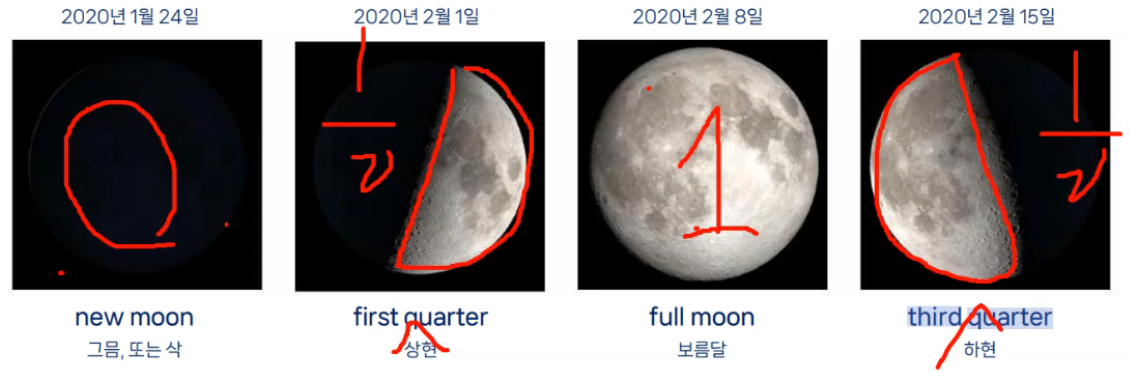
달의 위상 데이터를 숫자로 표현하면 데이터 처리가 용이할 수 있을 것

In [53]:
moon_phases.head(2)

,month,day,moonphase,specialevent,date
0,1,1,NaN,NaN,2020-01-01
1,1,2,first quarter,NaN,2020-01-02


In [54]:
moon_phases['moonphase'].unique()

array([nan, 'first quarter', 'full moon', 'third quarter', 'new moon'],
      dtype=object)

In [22]:
# 달의 위상 데이터를 숫자로 변환하기
phases = {}
phases

{'new moon': 0, 'first quarter': 0.5, 'third quarter': 0.5, 'full moon': 1}

In [58]:
phases={
    'new moon':0,
    'first quarter':0.5,
    'third quarter':0.5,
    'full moon':1
}

In [60]:
phases

{'new moon': 0, 'first quarter': 0.5, 'third quarter': 0.5, 'full moon': 1}

In [61]:
moon_phases['moonphase'].map(phases)

0      NaN
1      0.5
2      NaN
3      NaN
4      NaN
      ... 
361    NaN
362    NaN
363    1.0
364    NaN
365    NaN
Name: moonphase, Length: 366, dtype: float64

In [62]:
moon_phases['percentage']=moon_phases['moonphase'].map(phases)

In [63]:
# 달의위상 데이터프레임에 phases데이터를 이용하여 백분율 컬럼(percentage) 새롭게 추가하기
moon_phases

,month,day,moonphase,specialevent,date,percentage
0,1,1,NaN,NaN,2020-01-01,NaN
1,1,2,first quarter,NaN,2020-01-02,0.5
2,1,3,NaN,NaN,2020-01-03,NaN
3,1,4,NaN,NaN,2020-01-04,NaN
4,1,5,NaN,NaN,2020-01-05,NaN
...,...,...,...,...,...,...
361,12,27,NaN,NaN,2020-12-27,NaN
362,12,28,NaN,NaN,2020-12-28,NaN
363,12,29,full moon,NaN,2020-12-29,1.0
364,12,30,NaN,NaN,2020-12-30,NaN


In [64]:
moon_phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   month         366 non-null    int64         
 1   day           366 non-null    int64         
 2   moonphase     50 non-null     object        
 3   specialevent  10 non-null     object        
 4   date          366 non-null    datetime64[ns]
 5   percentage    50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 17.3+ KB


## 불필요한 컬럼 삭제

In [66]:
meteor_showers.head(2)
# 삭제할 정보 찾기
    # startmonth,startday,endmonth,endday,hemisphere 

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere,startdate,enddate
0,Lyrids,Lyra,4,4,21,4,22,northern,northern,2020-04-21,2020-04-22
1,Eta Aquarids,Aquarius,5,4,19,5,28,"northern, southern",southern,2020-04-19,2020-05-28


In [ ]:
moon_phases.head(2)
# 삭제할 정보 찾기
    # moonphase, month, day, specialevent

,month,day,moonphase,specialevent,date,percentage
0,1,1,NaN,NaN,2020-01-01,NaN
1,1,2,first quarter,NaN,2020-01-02,0.5


In [68]:
moon_phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   month         366 non-null    int64         
 1   day           366 non-null    int64         
 2   moonphase     50 non-null     object        
 3   specialevent  10 non-null     object        
 4   date          366 non-null    datetime64[ns]
 5   percentage    50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 17.3+ KB


In [71]:
constellations.head(2)
# 삭제할 정보 찾기
    # besttime

,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Lyra,8,90,-40,21:00,northern
1,Aquarius,10,65,-90,21:00,southern


In [72]:
# 각 데이터 프레임에서 불필요한 컬럼 삭제하기 
# meteor_showers.drop(columns=[])

meteor_showers.drop(columns=['startmonth','startday','endmonth','endday','hemisphere'])

,name,radiant,bestmonth,preferredhemisphere,startdate,enddate
0,Lyrids,Lyra,4,northern,2020-04-21,2020-04-22
1,Eta Aquarids,Aquarius,5,southern,2020-04-19,2020-05-28
2,Orionids,Orion,10,"northern, southern",2020-10-02,2020-11-07
3,Perseids,Perseus,8,northern,2020-07-14,2020-08-24
4,Leonids,Leo,11,"northern, southern",2020-11-06,2020-11-30


In [73]:
meteor_showers.drop(columns=['startmonth','startday','endmonth','endday','hemisphere'], inplace=True)
# 혹은
    # meteor_showers=meteor_showers.drop(columns=['startmonth','startday','endmonth','endday','hemisphere'])

In [74]:
meteor_showers

,name,radiant,bestmonth,preferredhemisphere,startdate,enddate
0,Lyrids,Lyra,4,northern,2020-04-21,2020-04-22
1,Eta Aquarids,Aquarius,5,southern,2020-04-19,2020-05-28
2,Orionids,Orion,10,"northern, southern",2020-10-02,2020-11-07
3,Perseids,Perseus,8,northern,2020-07-14,2020-08-24
4,Leonids,Leo,11,"northern, southern",2020-11-06,2020-11-30


In [75]:
moon_phases.head(1)

,month,day,moonphase,specialevent,date,percentage
0,1,1,NaN,NaN,2020-01-01,NaN


In [76]:
moon_phases.drop(columns=['month', 'day', 'specialevent'],inplace=True)

In [79]:
moon_phases.drop(columns='moonphase',inplace=True)

In [80]:
moon_phases

,date,percentage
0,2020-01-01,NaN
1,2020-01-02,0.5
2,2020-01-03,NaN
3,2020-01-04,NaN
4,2020-01-05,NaN
...,...,...
361,2020-12-27,NaN
362,2020-12-28,NaN
363,2020-12-29,1.0
364,2020-12-30,NaN


In [81]:
constellations.head(2)

,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Lyra,8,90,-40,21:00,northern
1,Aquarius,10,65,-90,21:00,southern


In [83]:
constellations.drop(columns=['besttime'],inplace=True)

In [84]:
constellations

,constellation,bestmonth,latitudestart,latitudeend,hemisphere
0,Lyra,8,90,-40,northern
1,Aquarius,10,65,-90,southern
2,Orion,1,85,-75,northern
3,Perseus,12,90,-35,northern
4,Leo,4,90,65,northern


## 달의 위상 누락값 처리

In [28]:
# 달의위상 데이터 프레임에서 percentage 컬럼의 결측치 처리하기
# 데이터 프레임의 각 행을 순회하면서 이전 위상값으로 채워넣기

# iterrows()를 사용하여 moon_phases 데이터프레임의 각 행을 순차적으로 반복하면서 행(row)과 그 행의 인덱스(index)를 가져옵니다.
# 결측값인 경우, lastphase에 저장된 값을 해당 행의 'percentage'에 채워 넣습니다. 즉, 이전에 확인된 마지막 'percentage' 값을 사용하여 결측값을 대체합니다.


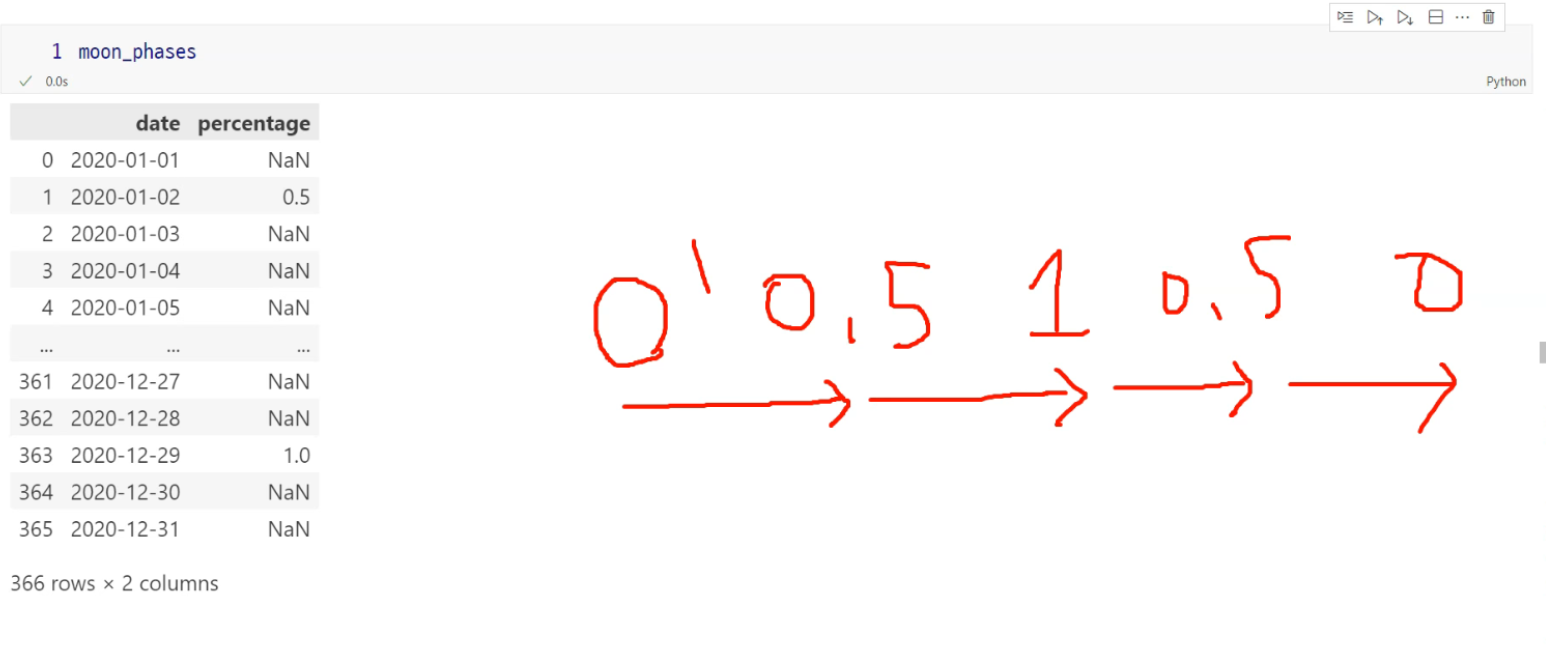

moonphase의 percentage가 0, 0,5, 1 사이에 NaN이 반복되기 때문에 숫자 데이터로 NaN을 채워 보려 한다.

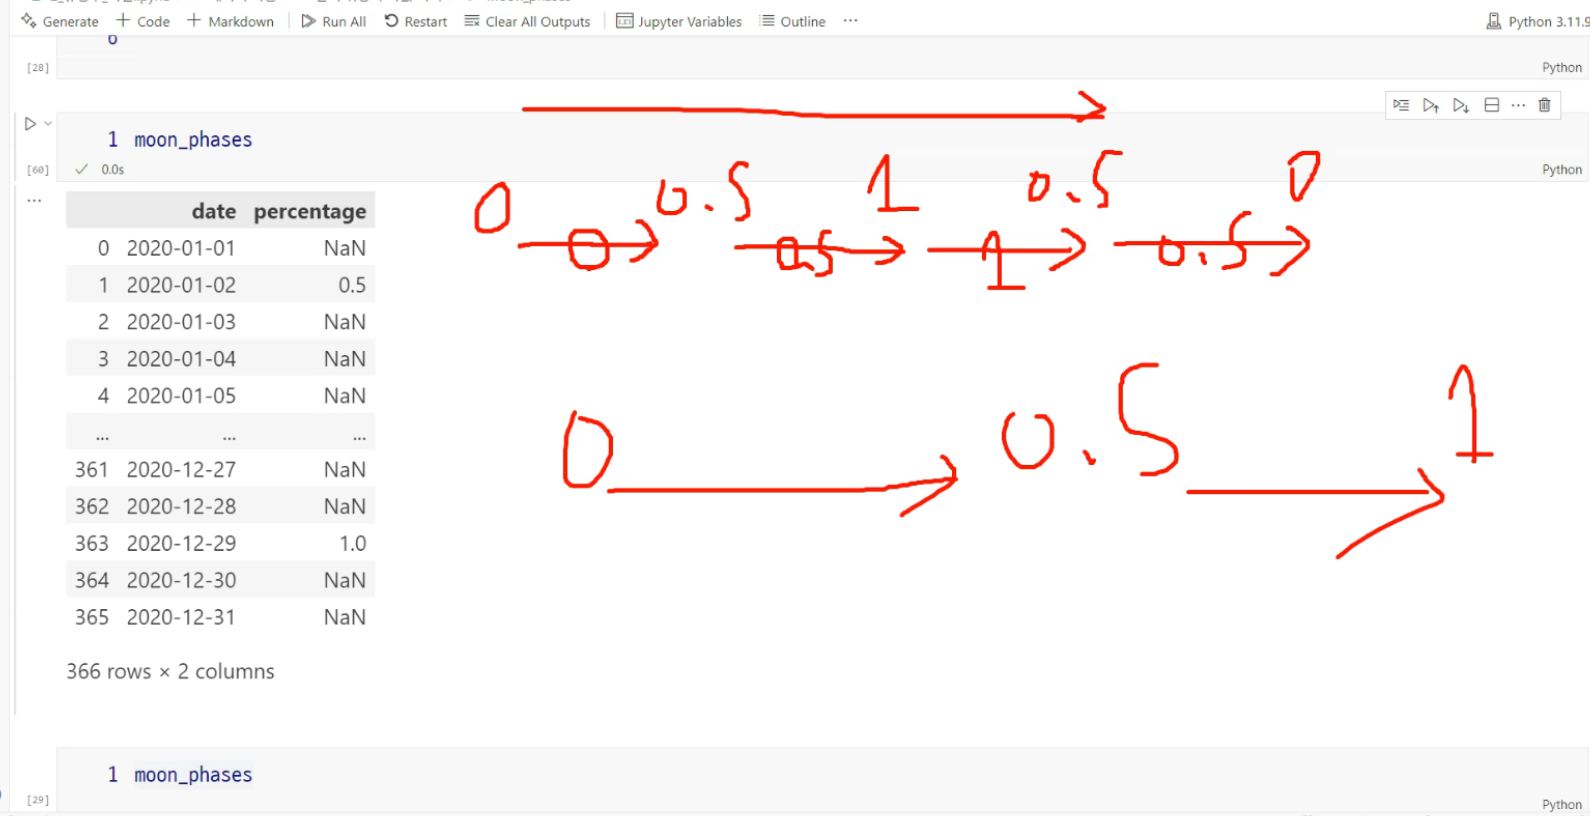
다른 숫자값을 넣기보단, 앞행의 숫자를 동일하게 NaN을 채워보려 한다.

In [85]:
moon_phases.head(5)

,date,percentage
0,2020-01-01,NaN
1,2020-01-02,0.5
2,2020-01-03,NaN
3,2020-01-04,NaN
4,2020-01-05,NaN


In [ ]:

# 데이터 프레임의 각 행을 순회하면서 이전 위상값으로 채워넣기

# iterrows()를 사용하여 moon_phases 데이터프레임의 각 행을 순차적으로 반복하면서 행(row)과 그 행의 인덱스(index)를 가져옵니다.
# 결측값인 경우, lastphase에 저장된 값을 해당 행의 'percentage'에 채워 넣습니다. 즉, 이전에 확인된 마지막 'percentage' 값을 사용하여 결측값을 대체합니다.



In [89]:
moon_phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        366 non-null    datetime64[ns]
 1   percentage  50 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [92]:
moon_phases['percentage'].isna()

0       True
1      False
2       True
3       True
4       True
       ...  
361     True
362     True
363    False
364     True
365     True
Name: percentage, Length: 366, dtype: bool

In [111]:
moon_phases

,date,percentage
0,2020-01-01,NaN
1,2020-01-02,0.5
2,2020-01-03,NaN
3,2020-01-04,NaN
4,2020-01-05,NaN
...,...,...
361,2020-12-27,NaN
362,2020-12-28,NaN
363,2020-12-29,1.0
364,2020-12-30,NaN


In [86]:
moon_phases.iterrows()

<generator object DataFrame.iterrows at 0x12db92ac0>

In [106]:
lastphase =0

for i in moon_phases['percentage']:
    print(i)
    if pd.isnull(i):
        i=lastphase
    else:
        lastphase=i
    print(i)

0.0
0.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
0.0
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
0.0
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
0.0
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5
0.0
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
nan
0.0
0.5
0.5
nan
0.5
nan
0.5
nan
0.5
nan
0.5


In [115]:
lastphase =0

for i in moon_phases.index:
    #print(i)
    val=moon_phases.loc[i,'percentage']
    if pd.isnull(val):
        moon_phases.loc[i,'percentage']=lastphase
    else:
        lastphase=val
    print(moon_phases)

          date  percentage
0   2020-01-01         0.0
1   2020-01-02         0.5
2   2020-01-03         0.5
3   2020-01-04         0.5
4   2020-01-05         0.5
..         ...         ...
361 2020-12-27         0.5
362 2020-12-28         0.5
363 2020-12-29         1.0
364 2020-12-30         1.0
365 2020-12-31         1.0

[366 rows x 2 columns]
          date  percentage
0   2020-01-01         0.0
1   2020-01-02         0.5
2   2020-01-03         0.5
3   2020-01-04         0.5
4   2020-01-05         0.5
..         ...         ...
361 2020-12-27         0.5
362 2020-12-28         0.5
363 2020-12-29         1.0
364 2020-12-30         1.0
365 2020-12-31         1.0

[366 rows x 2 columns]
          date  percentage
0   2020-01-01         0.0
1   2020-01-02         0.5
2   2020-01-03         0.5
3   2020-01-04         0.5
4   2020-01-05         0.5
..         ...         ...
361 2020-12-27         0.5
362 2020-12-28         0.5
363 2020-12-29         1.0
364 2020-12-30         1.0
365 202

In [117]:
lastphase=0

for idx, row in moon_phases.iterrows():
    if pd.isnull(row['percentage']):
        moon_phases.loc[idx,'percentage']=lastphase
    else:
        lastphase=row['percentage']
    print(moon_phases)

          date  percentage
0   2020-01-01         0.0
1   2020-01-02         0.5
2   2020-01-03         0.5
3   2020-01-04         0.5
4   2020-01-05         0.5
..         ...         ...
361 2020-12-27         0.5
362 2020-12-28         0.5
363 2020-12-29         1.0
364 2020-12-30         1.0
365 2020-12-31         1.0

[366 rows x 2 columns]
          date  percentage
0   2020-01-01         0.0
1   2020-01-02         0.5
2   2020-01-03         0.5
3   2020-01-04         0.5
4   2020-01-05         0.5
..         ...         ...
361 2020-12-27         0.5
362 2020-12-28         0.5
363 2020-12-29         1.0
364 2020-12-30         1.0
365 2020-12-31         1.0

[366 rows x 2 columns]
          date  percentage
0   2020-01-01         0.0
1   2020-01-02         0.5
2   2020-01-03         0.5
3   2020-01-04         0.5
4   2020-01-05         0.5
..         ...         ...
361 2020-12-27         0.5
362 2020-12-28         0.5
363 2020-12-29         1.0
364 2020-12-30         1.0
365 202

In [ ]:
# moon_phases.loc[0, 'percentage'] = np.nan
# moon_phases.loc[0, 'percentage'] = 0
moon_phases['percentage'].ffill(axis=0)



0      0.0
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
361    0.5
362    0.5
363    1.0
364    1.0
365    1.0
Name: percentage, Length: 366, dtype: float64

In [123]:
moon_phases

,date,percentage
0,2020-01-01,0.0
1,2020-01-02,0.5
2,2020-01-03,0.5
3,2020-01-04,0.5
4,2020-01-05,0.5
...,...,...
361,2020-12-27,0.5
362,2020-12-28,0.5
363,2020-12-29,1.0
364,2020-12-30,1.0


In [121]:
moon_phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        366 non-null    datetime64[ns]
 1   percentage  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


# 데이터 분석

## 위도 조회

In [ ]:
지정된 도시에서 각 유성우를 볼 수 있는 가능성이 높은 날짜를 예측하려고 합니다.

In [124]:
cities.head(2)

,city,latitude,country
0,Abu Dhabi,24.47,United Arab Emirates
1,Abuja,9.07,Nigeria


In [126]:
# 도시에 이름을 하면 별자리, 어떤 별자리 볼 수 있고 언제부터 언제까지 볼 수 있는지를 알려줄 거라서
# 도시 데이터프레임에서 검색한 열(검색한 도시의 위도)만 가져오기
cities['city']=='Abu Dhabi'

0       True
1      False
2      False
3      False
4      False
       ...  
251    False
252    False
253    False
254    False
255    False
Name: city, Length: 256, dtype: bool

In [171]:
cities.head(2)

,city,latitude,country
0,Abu Dhabi,24.47,United Arab Emirates
1,Abuja,9.07,Nigeria


loc, iloc  
dataframe  
series  
다시 공부하기

In [133]:
cities.loc[cities['city']=='Abu Dhabi','latitude']

0    24.47
Name: latitude, dtype: float64

### 도시명 입력 후 위도 반환

In [142]:
# 도시명을 입력하면 위도를 반환하는 함수 만들기


def predict_best_meteor_shower_viewing(city):
    latitude = cities.loc[cities['city']== city,'latitude'].iloc[0]
    return latitude

In [143]:
print(predict_best_meteor_shower_viewing('Abu Dhabi'))

24.47


In [144]:
print(predict_best_meteor_shower_viewing('Seoul'))

37.55


## 특정 위도에서 볼 수 있는 별자리 조회

In [145]:
constellations

,constellation,bestmonth,latitudestart,latitudeend,hemisphere
0,Lyra,8,90,-40,northern
1,Aquarius,10,65,-90,southern
2,Orion,1,85,-75,northern
3,Perseus,12,90,-35,northern
4,Leo,4,90,65,northern


In [147]:
latitude=37.55



In [149]:
constellations['latitudestart'] >= latitude

0    True
1    True
2    True
3    True
4    True
Name: latitudestart, dtype: bool

In [153]:
(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [154]:
constellations[(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)]

,constellation,bestmonth,latitudestart,latitudeend,hemisphere
0,Lyra,8,90,-40,northern
1,Aquarius,10,65,-90,southern
2,Orion,1,85,-75,northern
3,Perseus,12,90,-35,northern


In [158]:
constellations[(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)]['constellation']

0        Lyra
1    Aquarius
2       Orion
3     Perseus
Name: constellation, dtype: object

In [ ]:
temp = [(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)]['constellation']

In [161]:
type(temp)

pandas.core.series.Series

In [156]:
# .tolist() : 판다스에서 제공해주는, 리스트로 변환하는 함수

In [162]:
temp.tolist()

['Lyra', 'Aquarius', 'Orion', 'Perseus']

In [ ]:
# latitude = cities.loc[cities['city']== city,'latitude'].iloc[0]

In [ ]:
# constellations_list =constellations[(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)]['constellation']

In [ ]:
# 도시명을 입력하면 위도와 별자리 리스트를 반환하는 함수 만들기
def predict_best_meteor_shower_viewing(city):

    latitude = cities.loc[cities['city']== city,'latitude'].iloc[0]
    # df.loc[인덱스명, 컬럼명]
    # df.iloc[행번호, 열번호]

    constellations_list =constellations[(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)]
    ['constellation'].tolist()

    return latitude, constellations_list

없는 도시명을 입력했을 때, 출력값이 나올 수 없기에  
예외처리를 해야한다.

In [165]:
# 뉴질랜드 웰링턴으로 확인, 복수개의 별자리를 리턴.
predict_best_meteor_shower_viewing('Wellington')

(np.float64(-41.28), ['Aquarius', 'Orion'])

In [166]:
predict_best_meteor_shower_viewing('Seoul')

(np.float64(37.55), ['Lyra', 'Aquarius', 'Orion', 'Perseus'])

## 문자 안내 출력

In [49]:
cities.values # 도시명 전체 조회

array([['Abu Dhabi', 24.47, 'United Arab Emirates'],
       ['Abuja', 9.07, 'Nigeria'],
       ['Accra', 5.55, 'Ghana'],
       ['Adamstown', -25.07, 'Pitcairn Islands'],
       ['Addis Ababa', 9.02, 'Ethiopia'],
       ['Algiers', 36.77, 'Algeria'],
       ['Alofi', -19.07, 'Niue'],
       ['Amman', 31.93, 'Jordan'],
       ['Amsterdam', 52.37, 'Netherlands'],
       ['Andorra la Vella', 42.5, 'Andorra'],
       ['Ankara', 39.87, 'Turkey'],
       ['Antananarivo', -18.93, 'Madagascar'],
       ['Apia', -13.83, 'Samoa'],
       ['Ashgabat', 37.93, 'Turkmenistan'],
       ['Asmara', 15.33, 'Eritrea'],
       ['Asuncion', -25.27, 'Paraguay'],
       ['Athens', 37.97, 'Greece'],
       ['Avarua', -21.2, 'Cook Islands'],
       ['Baghdad', 33.33, 'Iraq'],
       ['Baku', 40.38, 'Azerbaijan'],
       ['Bamako', 12.65, 'Mali'],
       ['Bandar Seri Begawan', 4.88, 'Brunei'],
       ['Bangkok', 13.75, 'Thailand'],
       ['Bangui', 4.37, 'Central African Republic'],
       ['Banjul', 13.45, '

In [179]:
cities['city'].unique()

array(['Abu Dhabi', 'Abuja', 'Accra', 'Adamstown', 'Addis Ababa',
       'Algiers', 'Alofi', 'Amman', 'Amsterdam', 'Andorra la Vella',
       'Ankara', 'Antananarivo', 'Apia', 'Ashgabat', 'Asmara', 'Asuncion',
       'Athens', 'Avarua', 'Baghdad', 'Baku', 'Bamako',
       'Bandar Seri Begawan', 'Bangkok', 'Bangui', 'Banjul', 'Basseterre',
       'Beijing', 'Beirut', 'Belgrade', 'Belmopan', 'Berlin', 'Bern',
       'Bishkek', 'Bissau', 'Bloemfontein(judicial)', 'Bogota',
       'Brasilia', 'Bratislava', 'Brazzaville', 'Bridgetown', 'Brussels',
       'Bucharest', 'Budapest', 'Buenos Aires', 'Cairo', 'Canberra',
       'Cape Town(legislative)', 'Caracas', 'Castries', 'Cayenne',
       'Charlotte Amalie', 'Chi-in-u', 'Conakry', 'Copenhagen', 'Dakar',
       'Damascus', 'Dhaka', 'Dili', 'Djibouti', 'Dodoma(official)',
       'Dar es Salaam(former capital; some government offices remaining)',
       'Doha', 'Douglas', 'Dublin', 'Dushanbe',
       'Edinburgh of the Seven Seas', 'El Aaiun(dec

In [180]:
city='Busan'

if city in cities.values:
    print('물론')

In [181]:
city='Seoul'

if city in cities.values:
    print('물론')

물론


In [182]:
city='Busan'

if city in cities.values:
    print('물론')
else:
    print('없어')

없어


In [185]:
city='Busan'

meteor_shower_string=''

if city not in cities.values:
    meteor_shower_string='아쉽지만 입력하신 도시인 '+ city +'에서는 유성우 서비스를 제공하고 있지 않습니다.'


print(meteor_shower_string)

아쉽지만 입력하신 도시인 Busan에서는 유성우 서비스를 제공하고 있지 않습니다.


In [186]:
# 도시명을 입력하면 위도와 별자리 리스트를 반환하는 함수 만들기
# def predict_best_meteor_shower_viewing(city):

    # latitude = cities.loc[cities['city']== city,'latitude'].iloc[0]
        # df.loc[인덱스명, 컬럼명]
        # df.iloc[행번호, 열번호]

    #constellations_list =constellations[(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)]
    #'constellation'].tolist()

    #return latitude, constellations_list

In [187]:
cities[cities['city'].str.startswith('S')]

,city,latitude,country
191,Saipan,15.17,Northern Mariana Islands
192,San Jose,9.93,Costa Rica
193,San Juan,18.45,Puerto Rico
194,San Marino,43.93,San Marino
195,San Salvador,13.68,El Salvador
196,Sana'a,15.33,Yemen
197,Santiago(official),-33.45,Chile
199,Santo Domingo,18.47,Dominican Republic
200,Sao Tome,0.33,Sao Tome and Principe
201,Sarajevo,43.87,Bosnia and Herzegovina


In [50]:
# 도시명을 입력히면 위도와 별자리리스트와 메시지를 반환하는 함수

def predict_best_meteor_shower_viewing(city):
    
    
    return latitude, constellations_list, meteor_shower_string

def predict_best_meteor_shower_viewing(city):

    meteor_shower_string = ''

    # TODO: 잘못된 도시가 입력되었을 때 
    if city not in cities.values:
        meteor_shower_string = '아쉽지만 입력하신 도시인 ' + city +'에서는 유성우 서비스를 제공하고 있지 않습니다.'
        return meteor_shower_string
    
    latitude = cities.loc[cities['city'] == city,'latitude'].iloc[0]
    constellation_list = constellations[(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)]['constellation'].tolist()

    # TODO: 별자리가 존재하지 않으면 "아쉽지만 city에서는 볼 수 있는 별자리가 없습니다. "
    if not constellation_list:
        meteor_shower_string = f"아쉽지만 {city}에서는 볼 수 있는 별자리가 없습니다."
        return meteor_shower_string

    # TODO: city에서는 유성우 관측이 가능합니다. 
    meteor_shower_string = f'{city}에서는 유성우 관측이 가능합니다. '
    
    return latitude, constellation_list, meteor_shower_string

In [189]:
# 도시명을 입력하면 위도와 별자리 리스트를 메세지를 반환하는 함수 만들기

city='Seoul'

def predict_best_meteor_shower_viewing(city):

    meteor_shower_string=''
    
    # TODO : 잘못된 도시가 입력되었을 때
    if city not in cities.values:
        meteor_shower_string=f"아쉽디만 입력하신 도시인 {city}에서는 볼 수 있는 별자리가 없습니다."
        # 혹은 같은 문장 '아쉽지만 입력하신 도시인 '+ city +'에서는 볼 수 있는 별자리가 없습니다.'
        # meteor_shower_string=f."아쉽디만 입력하신 도시인 {city}에서는 볼 수 있는 별자리가 없습니다.
        return meteor_shower_string
    
    latitude = cities.loc[cities['city']== city,'latitude'].iloc[0]
    constellations_list =constellations[(constellations['latitudestart'] >= latitude) & (constellations['latitudeend'] <= latitude)]
    ['constellation'].tolist()
        # df.loc[인덱스명, 컬럼명]
        # df.iloc[행번호, 열번호]

    # TODO : 해당 도시에 별자리가 존재하지 않으면, "아쉽지만 city에서는 볼수 있는 별자리가 없습니다."
    if not constellations_list:
        meteor_shower_string=f"아쉽지만 {city}에서는 볼수 있는 별자리가 없습니다."
        return meteor_shower_string
    
    # TODO : city에서는 유성우 관측이 가능합니다.
    meteor_shower_string=f"{city}에서는 유성우 관측이 가능합니다."

        
    return latitude, constellations_list, meteor_shower_string

In [191]:
wellington = predict_best_meteor_shower_viewing('Wellington')
wellington

(np.float64(-41.28), ['Aquarius', 'Orion'], 'Wellington에서는 유성우 관측이 가능합니다. ')

In [193]:
Busan = predict_best_meteor_shower_viewing('Busan')
Busan

'아쉽지만 입력하신 도시인 Busan에서는 유성우 서비스를 제공하고 있지 않습니다.'

## 유성우 관측 기간 조회(선택한 도시에서 관측 가능한 별자리 추출)

In [194]:
meteor_showers.head()

,name,radiant,bestmonth,preferredhemisphere,startdate,enddate
0,Lyrids,Lyra,4,northern,2020-04-21,2020-04-22
1,Eta Aquarids,Aquarius,5,southern,2020-04-19,2020-05-28
2,Orionids,Orion,10,"northern, southern",2020-10-02,2020-11-07
3,Perseids,Perseus,8,northern,2020-07-14,2020-08-24
4,Leonids,Leo,11,"northern, southern",2020-11-06,2020-11-30


In [55]:
wellington

(np.float64(-41.28), ['Aquarius', 'Orion'], 'Wellington에서는 별자리 관측이 가능합니다.')

In [195]:
meteor_showers['radiant']

0        Lyra
1    Aquarius
2       Orion
3     Perseus
4         Leo
Name: radiant, dtype: object

In [196]:
meteor_showers['radiant'] == "Orion"

0    False
1    False
2     True
3    False
4    False
Name: radiant, dtype: bool

In [197]:
meteor_showers[meteor_showers['radiant'] == "Orion"]

,name,radiant,bestmonth,preferredhemisphere,startdate,enddate
2,Orionids,Orion,10,"northern, southern",2020-10-02,2020-11-07


In [198]:
meteor_showers.loc[meteor_showers['radiant'] == "Orion",'startdate']

2   2020-10-02
Name: startdate, dtype: datetime64[ns]

In [199]:
meteor_showers.loc[meteor_showers['radiant'] == "Orion",'startdate'].iloc[0]

Timestamp('2020-10-02 00:00:00')

In [200]:
meteor_showers_startdate=meteor_showers.loc[meteor_showers['radiant'] == "Orion",'startdate'].iloc[0]

In [ ]:
meteor_showers_enddate=meteor_showers.loc[meteor_showers['radiant'] == "Orion",'enddate'].iloc[0]

In [202]:
print(meteor_showers_startdate)
print(meteor_showers_enddate)

2020-10-02 00:00:00
2020-11-07 00:00:00


In [ ]:
# 유성우 관측 시작일 가져오기
# 여기서는 Wellington의 결과값을 가지고 조회
meteor_showers_startdate = # TODO
meteor_showers_startdate

Timestamp('2020-04-19 00:00:00')

In [ ]:
# 유성우 관측 종료일
meteor_showers_enddate = # TODO
meteor_showers_enddate

Timestamp('2020-05-28 00:00:00')

In [204]:
meteor_showers_startdate=meteor_showers.loc[meteor_showers['radiant'] == "Orion",'startdate'].iloc[0]
# dataframe접근해서 추출하는 방법
# meteor_showers_startdate=meteor_showers[meteor_showers['radiant'] == "Orion"]['startdate'].iloc[0]
meteor_showers_enddate=meteor_showers.loc[meteor_showers['radiant'] == "Orion",'enddate'].iloc[0]

## 달의 위상 최저치 추출

In [ ]:
# 달 위상의 최소값(달에서 반사되는 빛의 최소량)을 찾을 수 있습니다. 이 예측 함수에서는 첫 번째 날짜만 확인합니다.

# moon_phases에서 NaN값을 변경할 때, 앞 행의 데이터를 받아와서 NaN값을 전부 변경했었다.
# 그렇다면, 날짜순으로 행이 진행되기 때문에 Percentage 값이(예를 들어 0.5) 처음 등장하는 날짜를 추출하는 것이
# 달 위상의 최소값의 정확한 날인 것으로 알 수 있다. (언제 제일 어두워?-그믐)

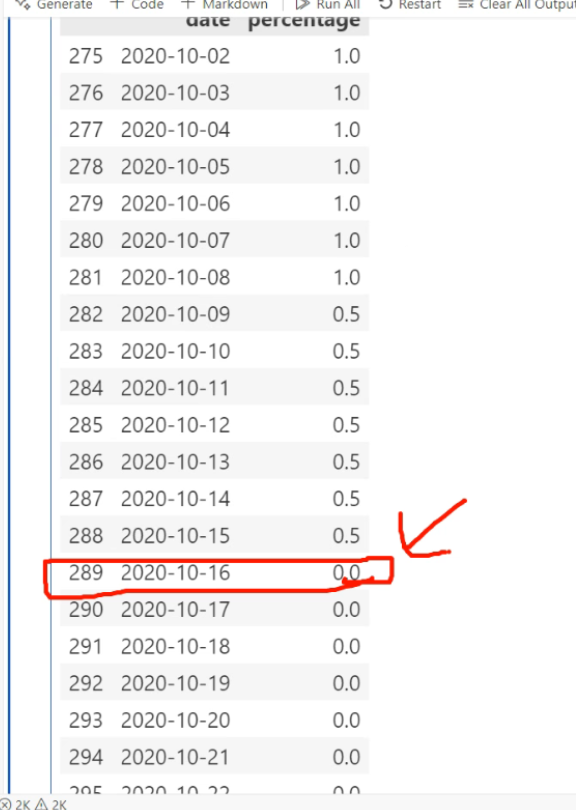

In [207]:
# meteor_showers_startdate=meteor_showers.loc[meteor_showers['radiant'] == "Orion",'startdate'].iloc[0]
# meteor_showers_enddate=meteor_showers.loc[meteor_showers['radiant'] == "Orion",'enddate'].iloc[0]

# 2개를 이용할 것이다.

In [214]:
moon_phase_list = moon_phases.loc[(moon_phases['date'] >= meteor_showers_startdate) & (moon_phases['date'] <= meteor_showers_enddate)]
moon_phase_list.tail(24)

,date,percentage
288,2020-10-15,0.5
289,2020-10-16,0.0
290,2020-10-17,0.0
291,2020-10-18,0.0
292,2020-10-19,0.0
293,2020-10-20,0.0
294,2020-10-21,0.0
295,2020-10-22,0.0
296,2020-10-23,0.5
297,2020-10-24,0.5


In [ ]:
# 가장 어두운 날 찾기
# idxmin() 최소값의 인덱스
# moon_phase_list = moon_phases.loc[(moon_phases['date'] >= meteor_showers_startdate) & (moon_phases['date'] <= meteor_showers_enddate)]
# moon_phase_list['percentage'].idxmin() # 가장 백분율이 적은 행 인덱스 반환
    # 결과 : np.int64(289)

# 인덱스로 해당 날짜를 찾는, loc를 사용하면 되지 않을까?

np.int64(289)

In [215]:

best_moon_date=moon_phase_list.loc[moon_phase_list['percentage'].idxmin()]['date']

In [216]:
best_moon_date

Timestamp('2020-10-16 00:00:00')

In [219]:
best_moon_date.to_pydatetime().strftime('%Y년 %m월 %d일')

'2020년 10월 16일'

In [ ]:
# 가장 어두운 날 찾기
# best_moon_date = # TODO
# best_moon_date
    # 결과1 : Timestamp('2020-10-16 00:00:00')
        #to.pydatetime().strfime('%Y년%m월%d일')
    # 결과2 : '2020년 10월 16일'


## 최적의 유성우 관측일

In [56]:
# 도시명을 입력하면 관측가능한 유성우에 대한 정보를 알려주는 함수 작성하기

def predict_best_meteor_shower_viewing(city):
    # 안내 메시지 초기화
    meteor_shower_string = ''

    # 입력한 도시 정보가 존재하지 않으면 오류 메시지
    
    
    # 도시의 위도 정보를 불러오기
    

    # 해당 도시의 위도에서 관측 가능한 별자리 조회
    


    # 볼 수 있는 별자리가 존재하지 않으면 오류 메시지
    
    
    # 별자리 관측 가능 안내 메시지
    
    
    # 도시별 관찰 가능한 별자리 iterate
    for constellation in constellations_list:
        # 별자리와 가장 가까운 유성우 조회
        

        # 유성우 관측이 가능한 시작일과 종료일
        

        # 유성우가 보일 때의 달의 위상 조회
        

        # 달이 눈에 보이는 첫 날 조회
        

        # 사용자에게 정보전달
         


    return meteor_shower_string

In [57]:
print(predict_best_meteor_shower_viewing('New York'))

아쉽지만 New York에서는 현재 유성우 예측이 어렵습니다.


In [58]:
print(predict_best_meteor_shower_viewing('Wellington'))

Wellington에서는 별자리 관측이 가능합니다: 

Eta Aquarids를 잘 보려면 Aquarius자리 위치를 향하여 April 22, 2020보면 됩니다.
Orionids를 잘 보려면 Orion자리 위치를 향하여 October 16, 2020보면 됩니다.



In [59]:
print(predict_best_meteor_shower_viewing('Seoul'))

Seoul에서는 별자리 관측이 가능합니다: 

Lyrids를 잘 보려면 Lyra자리 위치를 향하여 April 22, 2020보면 됩니다.
Eta Aquarids를 잘 보려면 Aquarius자리 위치를 향하여 April 22, 2020보면 됩니다.
Orionids를 잘 보려면 Orion자리 위치를 향하여 October 16, 2020보면 됩니다.
Perseids를 잘 보려면 Perseus자리 위치를 향하여 July 20, 2020보면 됩니다.



# 항아 유성우 데이터 추가

In [60]:
# 항아 유성우 데이터 추가하기
change_meteor_shower = {'name' : "Chang\'e", 'radiant' : 'Draco', 'bestmonth' : 'october', 'startmonth': 'october', 'startday' : 1,
                        'endmonth' : 'october', 'endday' : 31, 'hemisphere' : 'northern', 'preferredhemisphere' : 'northern' }
change_meteor_shower_df = pd.DataFrame(change_meteor_shower,index = [0])
change_meteor_shower_df

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Chang'e,Draco,october,october,1,october,31,northern,northern


In [61]:
# meteorshowers.csv 파일 읽어와서 new_meteor_showers 변수에 저장
new_meteor_showers = pd.read_csv('meteorshowers.csv')
new_meteor_showers

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,april,april,21,april,22,northern,northern
1,Eta Aquarids,Aquarius,may,april,19,may,28,"northern, southern",southern
2,Orionids,Orion,october,october,2,november,7,"northern, southern","northern, southern"
3,Perseids,Perseus,august,july,14,august,24,northern,northern
4,Leonids,Leo,november,november,6,november,30,"northern, southern","northern, southern"


In [ ]:
# new_meteor_showers 데이터프레임에 change_meteor_shower_df 데이터프레임 추가하기 concat
new_meteor_showers = # TODO
new_meteor_showers

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,april,april,21,april,22,northern,northern
1,Eta Aquarids,Aquarius,may,april,19,may,28,"northern, southern",southern
2,Orionids,Orion,october,october,2,november,7,"northern, southern","northern, southern"
3,Perseids,Perseus,august,july,14,august,24,northern,northern
4,Leonids,Leo,november,november,6,november,30,"northern, southern","northern, southern"
5,Chang'e,Draco,october,october,1,october,31,northern,northern


In [63]:
# Chang'e 유성우에 대해 Draconids 유성우가 10월 초에 발생할 가능성이 높은 용자리를 선택합니다. 이 유성우를 가상 유성우의 참조로 사용
# 용자리 항목 추가하기기
draco_constellation = {'constellation' : 'Draco', 'bestmonth' : 'july', 'latitudestart' : 90, 'latitudeend' : -15, 'besttime' :2100, 'hemisphere' : 'northern'}
draco_constellation_df = pd.DataFrame(draco_constellation, index = [0])
draco_constellation_df

,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Draco,july,90,-15,2100,northern


In [64]:
# 별자리 파일 읽어와서 new_constellations에 저장하기
new_constellations = pd.read_csv('constellations.csv')
new_constellations

,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Lyra,august,90,-40,21:00,northern
1,Aquarius,october,65,-90,21:00,southern
2,Orion,january,85,-75,21:00,northern
3,Perseus,december,90,-35,21:00,northern
4,Leo,april,90,65,21:00,northern


In [ ]:
# new_constellations 데이터프레임에 draco_constellation_df 추가하기 concat
new_constellations =  # TODO
new_constellations

,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Lyra,august,90,-40,21:00,northern
1,Aquarius,october,65,-90,21:00,southern
2,Orion,january,85,-75,21:00,northern
3,Perseus,december,90,-35,21:00,northern
4,Leo,april,90,65,21:00,northern
5,Draco,july,90,-15,2100,northern


In [123]:
# new_meteor_showers 데이터프레임 월명 매핑


,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere
0,Lyrids,Lyra,4,4,21,4,22,northern,northern
1,Eta Aquarids,Aquarius,5,4,19,5,28,"northern, southern",southern
2,Orionids,Orion,10,10,2,11,7,"northern, southern","northern, southern"
3,Perseids,Perseus,8,7,14,8,24,northern,northern
4,Leonids,Leo,11,11,6,11,30,"northern, southern","northern, southern"
5,Chang'e,Draco,10,10,1,10,31,northern,northern


In [124]:
# new_constellations 데이터프레임 월명 매핑

new_constellations

,constellation,bestmonth,latitudestart,latitudeend,besttime,hemisphere
0,Lyra,8,90,-40,21:00,northern
1,Aquarius,10,65,-90,21:00,southern
2,Orion,1,85,-75,21:00,northern
3,Perseus,12,90,-35,21:00,northern
4,Leo,4,90,65,21:00,northern
5,Draco,7,90,-15,2100,northern


In [125]:
# new_meteor_showers 날짜형식 바꿔서 새로운 컬럼으로 추가 startdate, enddate


new_meteor_showers

,name,radiant,bestmonth,startmonth,startday,endmonth,endday,hemisphere,preferredhemisphere,startdate,enddate
0,Lyrids,Lyra,4,4,21,4,22,northern,northern,2020-04-21,2020-04-22
1,Eta Aquarids,Aquarius,5,4,19,5,28,"northern, southern",southern,2020-04-19,2020-05-28
2,Orionids,Orion,10,10,2,11,7,"northern, southern","northern, southern",2020-10-02,2020-11-07
3,Perseids,Perseus,8,7,14,8,24,northern,northern,2020-07-14,2020-08-24
4,Leonids,Leo,11,11,6,11,30,"northern, southern","northern, southern",2020-11-06,2020-11-30
5,Chang'e,Draco,10,10,1,10,31,northern,northern,2020-10-01,2020-10-31


In [126]:
# 도시명을 입력히면 별자리 정보를 알려주는 함수 완성하기
def predict_best_meteor_shower_viewing(city):
    


    return meteor_shower_string

In [127]:
print(predict_best_meteor_shower_viewing('Beijing'))

Beijing에서는 별자리 관측이 가능합니다: 

Lyrids를 잘 보려면 Lyra자리 위치를 향하여 April 22, 2020보면 됩니다.
Eta Aquarids를 잘 보려면 Aquarius자리 위치를 향하여 April 22, 2020보면 됩니다.
Orionids를 잘 보려면 Orion자리 위치를 향하여 October 16, 2020보면 됩니다.
Perseids를 잘 보려면 Perseus자리 위치를 향하여 July 20, 2020보면 됩니다.
Chang'e를 잘 보려면 Draco자리 위치를 향하여 October 16, 2020보면 됩니다.

